In [1]:
import pandas as pd
car_sales_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv", encoding='cp1252')

In [2]:
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

from datetime import datetime, timedelta
import numpy as np
car_sales_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv", encoding='cp1252')

In [3]:
car_sales_data.head(100)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.00,crossover,68,2.50,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.00,sedan,173,1.80,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.00,other,135,5.50,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.00,van,162,1.80,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.00,vagon,91,NaN,Other,yes,2013,E-Class,NaN
...,...,...,...,...,...,...,...,...,...,...
95,Mercedes-Benz,16500.00,van,223,2.20,Diesel,yes,2009,Vito ïàññ.,rear
96,Volkswagen,17900.00,crossover,145,3.00,Diesel,yes,2007,Touareg,full
97,Volkswagen,0.00,van,165,2.00,Diesel,yes,2013,T5 (Transporter) ãðóç,front
98,Mercedes-Benz,20400.00,sedan,190,1.80,Gas,yes,2011,E-Class,rear


In [4]:
car_sales_data.describe()

,price,mileage,engV,year
count,9576.00,9576.00,9142.00,9576.00
mean,15633.32,138.86,2.65,2006.61
std,24106.52,98.63,5.93,7.07
min,0.00,0.00,0.10,1953.00
25%,4999.00,70.00,1.60,2004.00
50%,9200.00,128.00,2.00,2008.00
75%,16700.00,194.00,2.50,2012.00
max,547800.00,999.00,99.99,2016.00


In [5]:
#lets check for duplicates
duplicate = car_sales_data[car_sales_data.duplicated()]
len(duplicate)

113

In [6]:
#drop duplicates
car_sales_data = car_sales_data.drop_duplicates()
len(car_sales_data)

9463

In [7]:
car_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9463 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9463 non-null   object 
 1   price         9463 non-null   float64
 2   body          9463 non-null   object 
 3   mileage       9463 non-null   int64  
 4   engV          9029 non-null   float64
 5   engType       9463 non-null   object 
 6   registration  9463 non-null   object 
 7   year          9463 non-null   int64  
 8   model         9463 non-null   object 
 9   drive         8953 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 813.2+ KB


In [8]:
#check missing values
car_sales_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           510
dtype: int64

In [9]:
car_sales_data.dropna(subset=['drive'], inplace = True)

In [10]:
car_sales_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            326
engType           0
registration      0
year              0
model             0
drive             0
dtype: int64

In [11]:
#checking the number of unique car registrations
car_sales_data['car'].nunique()

83

In [12]:
car_sales_data['year'].nunique()

55

In [13]:
groupby_avg = pd.DataFrame(car_sales_data.groupby('car')['model'].nunique()) #number of unique models per car

In [14]:
groupby_avg.head(100)

,model
car,
Acura,5
Alfa Romeo,6
Aro,1
Aston Martin,2
Audi,20
...,...
Volvo,10
Wartburg,1
ZAZ,10


<Axes: xlabel='car'>

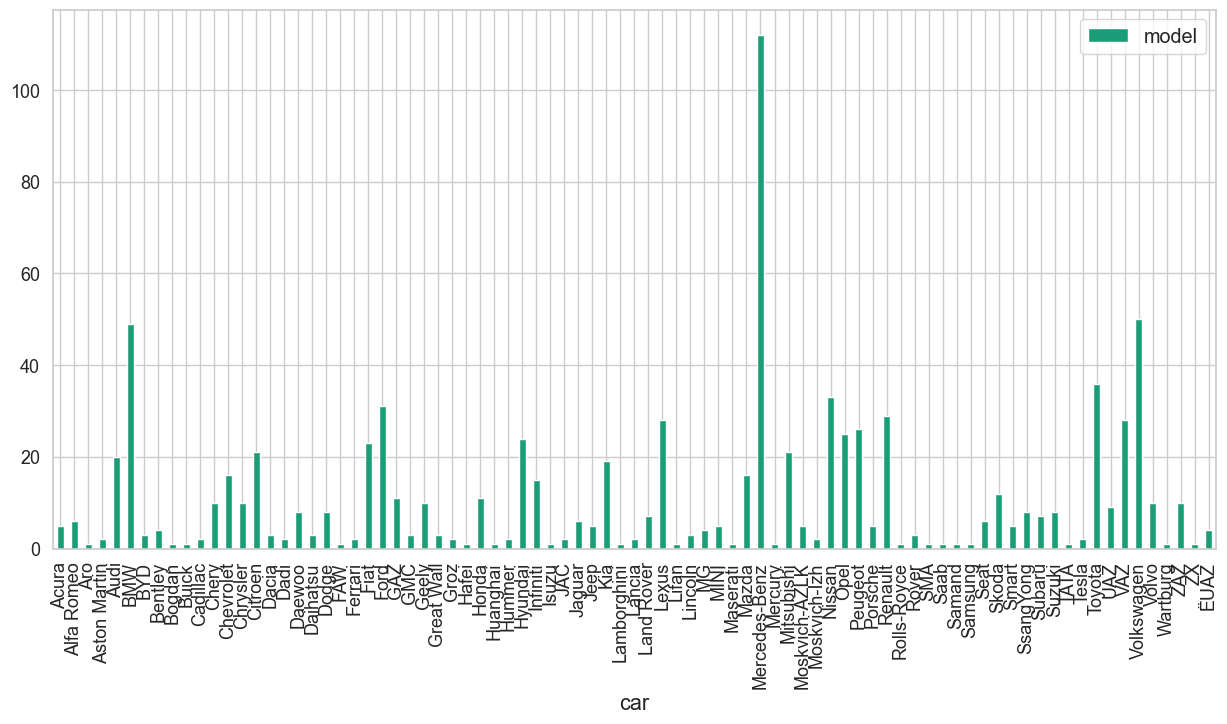

In [15]:
groupby_avg.plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13)

In [16]:
groupby_avg.describe()

,model
count,83.00
mean,10.61
std,15.77
min,1.00
25%,2.00
50%,5.00
75%,11.50
max,112.00


In [17]:
#total price per car

groupby_car = pd.DataFrame(car_sales_data.groupby('car')['price'].sum())
groupby_car

,price
car,
Acura,241207.00
Alfa Romeo,99449.00
Aro,3600.00
Aston Martin,315000.00
Audi,7758799.55
...,...
Volvo,554470.00
Wartburg,1000.00
ZAZ,300206.37


<Axes: xlabel='car'>

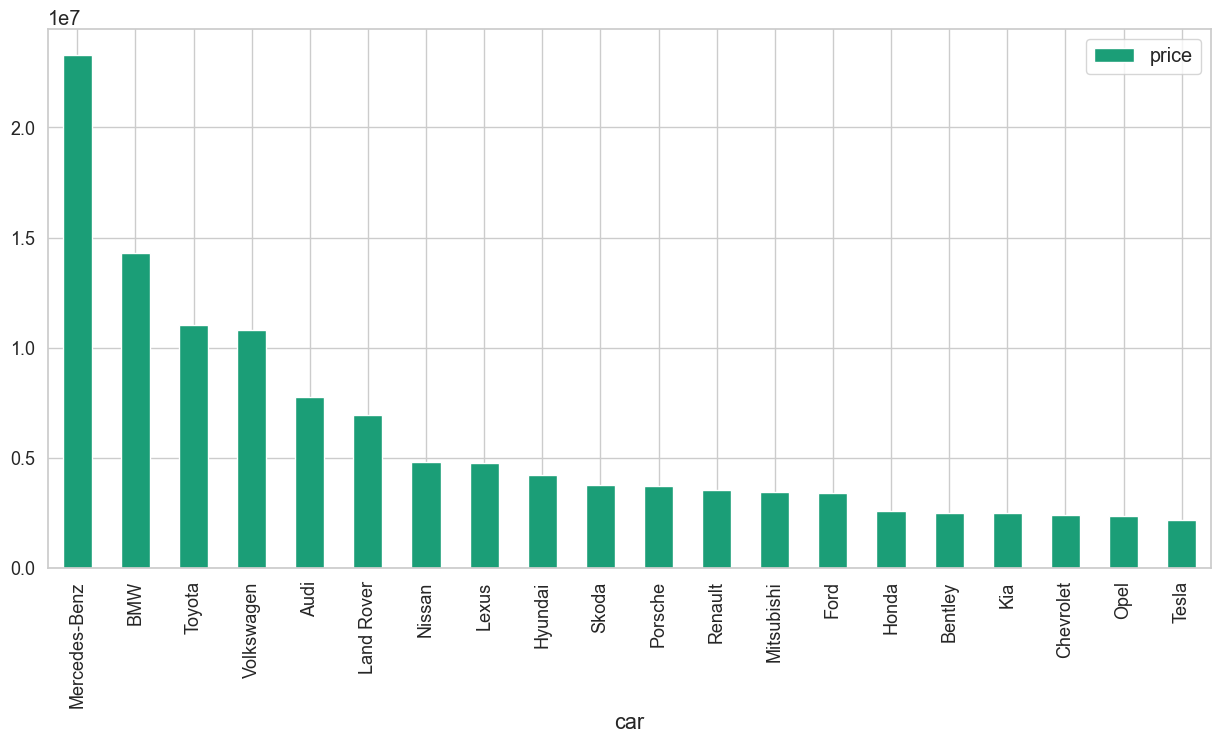

In [18]:
groupby_car.sort_values(by = 'price', ascending=False).head(20).plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13)